# [CDAF] Atividade 3

## Nome: Thiago Pádua de Carvalho

## Matrícula: 2020007066

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotsoccer
import numpy as np
import socceraction.spadl
import re

from functools import partial
from mplsoccer import Pitch, Sbopen, VerticalPitch
from scipy import stats

O jogo escolhido é entre Liverpool e Manchester City pela Premier League 2017/2018, ocorrido em 14/01/2018.

In [3]:
matches_england = pd.read_json('../data/matches/matches_England.json')
liv_city_df = matches_england[(matches_england['label'] == 'Liverpool - Manchester City, 4 - 3')]
liv_city_id = liv_city_df.iloc[0]['wyId']
liv_city_id

2499943

In [4]:
events_england = pd.read_json('../data/events/events_England.json')
liv_city_events = events_england[(events_england['matchId'] == liv_city_id)]

In [5]:
correct_columns = {'eventId':'type_id', 'subEventName':'subtype_name', 'playerId':'player_id',
              'matchId':'game_id', 'eventName':'type_name', 'teamId':'team_id',
              'eventSec':'milliseconds', 'subEventId':'subtype_id', 'id':'event_id'
              }

liv_city_events.rename(columns=correct_columns, inplace=True)
liv_city_events['period_id'] = pd.factorize(liv_city_events['matchPeriod'])[0]+1
liv_city_events['milliseconds'] = liv_city_events['milliseconds'] * 1000  # convert to milliseconds
liv_city_events

/tmp/ipykernel_55126/4069446362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_city_events.rename(columns=correct_columns, inplace=True)
/tmp/ipykernel_55126/4069446362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liv_city_events['period_id'] = pd.factorize(liv_city_events['matchPeriod'])[0]+1
/tmp/ipykernel_55126/4069446362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,type_id,subtype_name,tags,player_id,positions,game_id,type_name,team_id,matchPeriod,milliseconds,subtype_id,event_id,period_id
378660,8,Simple pass,[{'id': 1801}],15808,"[{'y': 49, 'x': 49}, {'y': 41, 'x': 31}]",2499943,Pass,1612,1H,2528.085,85,220933014,1
378661,8,Simple pass,[{'id': 1801}],25393,"[{'y': 41, 'x': 31}, {'y': 70, 'x': 34}]",2499943,Pass,1612,1H,6517.082,85,220933015,1
378662,8,Simple pass,[{'id': 1801}],14870,"[{'y': 70, 'x': 34}, {'y': 41, 'x': 28}]",2499943,Pass,1612,1H,10732.865,85,220933016,1
378663,8,Simple pass,[{'id': 1801}],25393,"[{'y': 41, 'x': 28}, {'y': 50, 'x': 7}]",2499943,Pass,1612,1H,14110.714,85,220933017,1
378664,8,Launch,[{'id': 1802}],15175,"[{'y': 50, 'x': 7}, {'y': 9, 'x': 61}]",2499943,Pass,1612,1H,16587.550,84,220933018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380531,3,Free Kick,[{'id': 1801}],15175,"[{'y': 42, 'x': 10}, {'y': 48, 'x': 67}]",2499943,Free Kick,1612,2H,2983986.610,31,220934883,2
380532,1,Air duel,"[{'id': 701}, {'id': 1802}]",15808,"[{'y': 48, 'x': 67}, {'y': 35, 'x': 73}]",2499943,Duel,1612,2H,2988693.400,10,220934885,2
380533,1,Air duel,"[{'id': 703}, {'id': 1801}]",105339,"[{'y': 52, 'x': 33}, {'y': 65, 'x': 27}]",2499943,Duel,1625,2H,2988734.839,10,220934931,2
380534,8,Launch,[{'id': 1802}],9380,"[{'y': 65, 'x': 27}, {'y': 55, 'x': 46}]",2499943,Pass,1625,2H,2990658.798,84,220934933,2


In [6]:
liv_city_spadl = socceraction.spadl.wyscout.convert_to_actions(liv_city_events, 1612)
liv_city_spadl

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,0,1,0
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,0,0,1,1
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,0,0,1,2
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,0,0,1,3
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2499943,2,2873.344410,1612,8319,23.10,58.48,23.10,58.48,220934874,0,8,1,1406
1407,2499943,2,2948.558595,1625,38021,23.10,64.60,10.50,44.20,220934929,0,3,0,1407
1408,2499943,2,2983.986610,1612,15175,10.50,39.44,70.35,35.36,220934883,0,4,1,1408
1409,2499943,2,2990.658798,1625,9380,76.65,44.20,56.70,37.40,220934933,0,0,0,1409


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [7]:
typename = socceraction.spadl.actiontypes_df()
bodyparts = socceraction.spadl.bodyparts_df()
results = socceraction.spadl.results_df()
merged = pd.merge(liv_city_spadl, typename, on='type_id')
merged1 = pd.merge(merged, bodyparts, on='bodypart_id')
final_match_events = pd.merge(merged1, results, on='result_id')
final_match_events = final_match_events.drop(['type_id', 'bodypart_id', 'result_id'], axis=1)
final_match_events = final_match_events.rename(columns={'type_name': 'type', 'bodypart_name':'bodypart', 'result_name':'result'})

In [8]:
# sort dataframe by period id and time when the event happened
final_match_events = final_match_events.sort_values(by=['period_id', 'time_seconds'])
final_match_events.reset_index(drop=True, inplace=True)
final_match_events

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,pass,foot,success
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,1,pass,foot,success
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,2,pass,foot,success
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,3,pass,foot,success
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,4,pass,foot,offside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2499943,2,2873.344410,1612,8319,23.10,58.48,23.10,58.48,220934874,1406,foul,foot,success
1407,2499943,2,2948.558595,1625,38021,23.10,64.60,10.50,44.20,220934929,1407,freekick_crossed,foot,fail
1408,2499943,2,2983.986610,1612,15175,10.50,39.44,70.35,35.36,220934883,1408,freekick_short,foot,success
1409,2499943,2,2990.658798,1625,9380,76.65,44.20,56.70,37.40,220934933,1409,pass,foot,fail


In [9]:
# finding succesful shots (goals)
display(final_match_events[(final_match_events['type'] == 'shot') & (final_match_events['result'] == 'success')])

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
163,2499943,1,528.586171,1612,7868,85.05,21.76,105.0,37.4,220933208,163,shot,foot,success
638,2499943,1,2403.544100,1625,245364,6.30,19.72,0.0,30.6,220933931,638,shot,foot,success
958,2499943,2,836.718735,1612,15808,93.45,44.88,105.0,30.6,220934280,958,shot,foot,success
978,2499943,2,963.928509,1612,25747,91.35,43.52,105.0,37.4,220934313,978,shot,foot,success
1055,2499943,2,1323.837327,1612,120353,70.35,44.88,105.0,34.0,220934410,1055,shot,foot,success
1283,2499943,2,2292.703245,1625,265673,7.35,43.52,0.0,37.4,220934795,1283,shot,foot,success
1390,2499943,2,2757.268603,1625,14808,10.50,40.12,0.0,37.4,220934911,1390,shot,foot,success


In [10]:
# As ações serão compostas pelo último gol e os 5 eventos anteriores
actions = final_match_events.iloc[1385:1391]
actions

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
1385,2499943,2,2744.451856,1625,8277,49.35,59.16,30.45,40.12,220934907,1385,pass,foot,success
1386,2499943,2,2748.857070,1612,25393,30.45,40.12,22.05,24.48,220934824,1386,tackle,foot,fail
1387,2499943,2,2752.105113,1625,245364,22.05,24.48,12.60,17.00,220934909,1387,pass,foot,success
1388,2499943,2,2753.623961,1625,8325,12.60,17.00,9.45,17.00,NaN,1388,dribble,foot,success
1389,2499943,2,2755.142809,1625,8325,9.45,17.00,10.50,40.12,220934910,1389,cross,foot,success
1390,2499943,2,2757.268603,1625,14808,10.50,40.12,0.00,37.40,220934911,1390,shot,foot,success


In [11]:
players = pd.read_json('../data/players.json')
teams = pd.read_json('../data/teams.json')

In [12]:
def find_names(actions: pd.DataFrame, df: pd.DataFrame, columns: list):
    names_list = []
    for name in actions[columns[0]]:
        names_list.append(df[df['wyId'] == name][columns[1]].values[0])
    return pd.DataFrame(names_list)

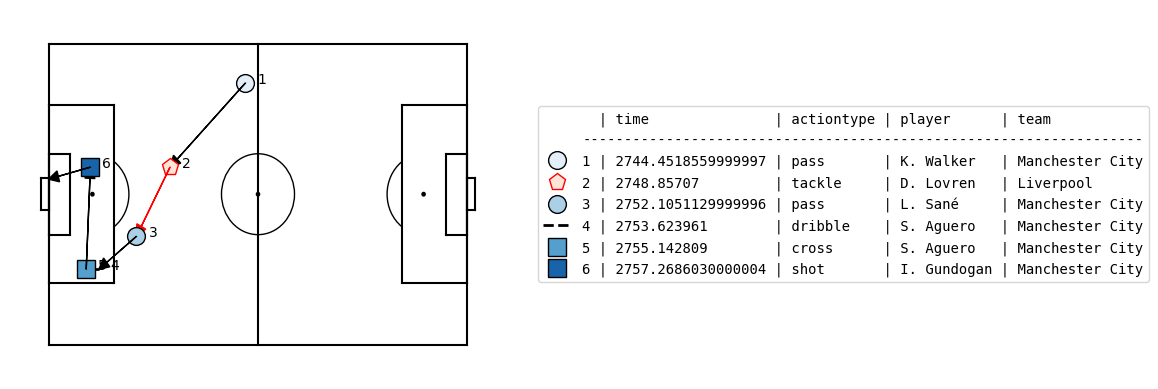

In [13]:
matplotsoccer.actions(
    location=actions[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions.type,
    team=actions.team_id,
    result= actions.result == "success",
    label=pd.concat([actions[["time_seconds","type"]].reset_index(drop=True),
                    find_names(actions, players, ['player_id', 'shortName']),
                    find_names(actions, teams, ['team_id', 'name'])], axis=1),
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

In [14]:
final_match_events

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499943,1,2.528085,1612,15808,51.45,34.68,32.55,40.12,220933014,0,pass,foot,success
1,2499943,1,6.517082,1612,25393,32.55,40.12,35.70,20.40,220933015,1,pass,foot,success
2,2499943,1,10.732865,1612,14870,35.70,20.40,29.40,40.12,220933016,2,pass,foot,success
3,2499943,1,14.110714,1612,25393,29.40,40.12,7.35,34.00,220933017,3,pass,foot,success
4,2499943,1,16.587550,1612,15175,7.35,34.00,64.05,61.88,220933018,4,pass,foot,offside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,2499943,2,2873.344410,1612,8319,23.10,58.48,23.10,58.48,220934874,1406,foul,foot,success
1407,2499943,2,2948.558595,1625,38021,23.10,64.60,10.50,44.20,220934929,1407,freekick_crossed,foot,fail
1408,2499943,2,2983.986610,1612,15175,10.50,39.44,70.35,35.36,220934883,1408,freekick_short,foot,success
1409,2499943,2,2990.658798,1625,9380,76.65,44.20,56.70,37.40,220934933,1409,pass,foot,fail


In [28]:
team1, team2 = pd.unique(find_names(final_match_events, teams, ['team_id', 'name'])[0])

'Liverpool'

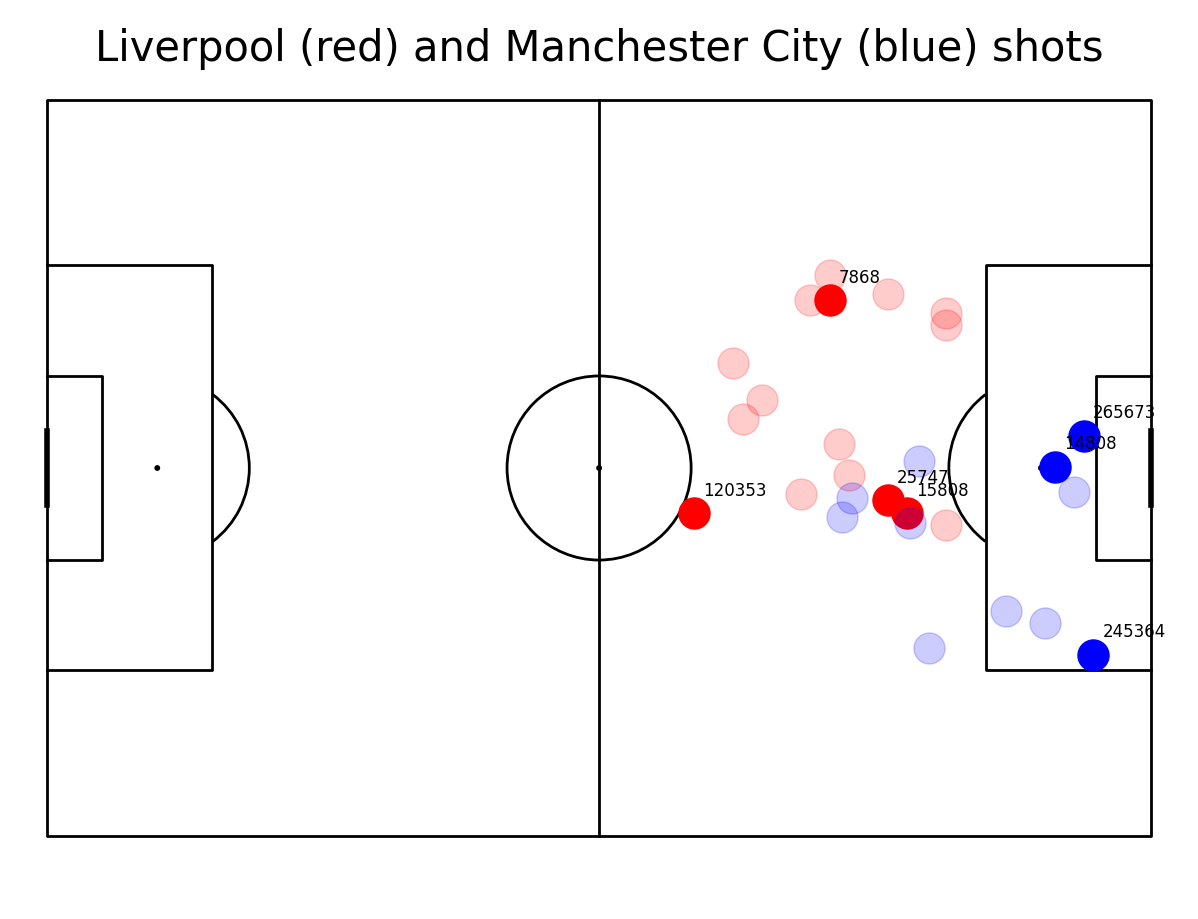

In [66]:
def plot_shots(df: pd.DataFrame, team1: int, team2: int):   
   #create pitch
   pitch = Pitch(line_color='black')
   fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
   #query
   mask_liverpool = df.loc[(df['type'] == 'shot') & (df['team_id'] == team1)]
   #finding rows in the df and keeping only necessary columns
   df_liverpool = mask_liverpool.loc[:, ['start_x', 'start_y', 'result', 'type', 'player_id']]

   #plot them - if shot ended with Goal - alpha 1 and add name

   for i, row in df_liverpool.iterrows():
      if row["type"] == "shot" and row["result"] == "success":
      #make circle
         pitch.scatter(row.start_x, row.start_y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
         pitch.annotate(row["player_id"], (row.start_x + 1, row.start_y - 2), ax=ax['pitch'], fontsize = 12)
      else:
         pitch.scatter(row.start_x, row.start_y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

   mask_city = df.loc[(df['type'] == 'shot') & (df['team_id'] == team2)]
   df_city = mask_city.loc[:, ['start_x', 'start_y', 'result', 'type', 'player_id']]

   #for Sweden we need to revert coordinates
   for i, row in df_city.iterrows():
      if row["type"] == "shot" and row["result"] == 'success':
         pitch.scatter(120 - row.start_x, 80 - row.start_y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
         pitch.annotate(row["player_id"], (120 - row.start_x + 1, 80 - row.start_y - 2), ax=ax['pitch'], fontsize = 12)
      else:
         pitch.scatter(120 - row.start_x, 80 - row.start_y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

   fig.suptitle("Liverpool (red) and Manchester City (blue) shots", fontsize = 30)
   plt.show()

plot_shots(final_match_events, 1612, 1625)

In [50]:
for i, row in df_liverpool.iterrows():
    print(row[])

start_x        86.1
start_y        37.4
result         fail
player_id    120353
Name: 63, dtype: object
start_x        85.05
start_y        21.76
result       success
player_id       7868
Name: 163, dtype: object
start_x       97.65
start_y       24.48
result         fail
player_id    120353
Name: 247, dtype: object
start_x      97.65
start_y      23.12
result        fail
player_id    15808
Name: 464, dtype: object
start_x      74.55
start_y      28.56
result        fail
player_id      116
Name: 590, dtype: object
start_x       85.05
start_y       19.04
result         fail
player_id    120353
Name: 611, dtype: object
start_x       82.95
start_y       21.76
result         fail
player_id    120353
Name: 683, dtype: object
start_x       75.6
start_y      34.68
result        fail
player_id    15808
Name: 717, dtype: object
start_x       91.35
start_y       21.08
result         fail
player_id    120353
Name: 898, dtype: object
start_x      97.65
start_y      46.24
result        fail
player_

In [48]:
df_liverpool = mask_liverpool.loc[:, ['start_x', 'start_y', 'result', "player_id"]]
df_liverpool

,start_x,start_y,result,player_id
63,86.10,37.40,fail,120353
163,85.05,21.76,success,7868
247,97.65,24.48,fail,120353
464,97.65,23.12,fail,15808
590,74.55,28.56,fail,116
611,85.05,19.04,fail,120353
683,82.95,21.76,fail,120353
717,75.60,34.68,fail,15808
898,91.35,21.08,fail,120353
908,97.65,46.24,fail,7868


## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?